## Regression

### Business Problem

You recently started working for a company that manufactures and sells high-end home goods. Last year the company sent out its first print catalog, and is preparing to send out this year's catalog in the coming months. The company has 250 new customers from their mailing list that they want to send the catalog to.

Your manager has been asked to determine how much profit the company can expect from sending a catalog to these customers. You, the business analyst, are assigned to help your manager run the numbers. While fairly knowledgeable about data analysis, your manager is not very familiar with predictive models.

You’ve been asked to predict the expected profit from these 250 new customers. Management does not want to send the catalog out to these new customers unless the expected profit contribution exceeds $10,000.

#### Details

    
        
<ol>
  <p><li>The costs of printing and distributing is $6.50 per catalog.</li>
  
  <li>The average gross margin (price - cost) on all products sold through the catalog is 50%. </li>
  
  <li> Make sure to multiply your revenue by the gross margin first before you subtract out the $6.50 cost when calculating your profit.</li>
    </p>
</ol>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_excel('./Desktop/Udacity/LinearRegression/LinearRegression/p1-customers.xlsx')
df.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [3]:
df.describe()

,Customer_ID,ZIP,Avg_Sale_Amount,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,1647.845474,80123.333474,399.774093,104.297684,3.347368,4.500632
std,962.728105,107.255770,340.115808,2.837240,2.738568,2.309986
min,2.000000,80002.000000,1.220000,100.000000,1.000000,1.000000
25%,820.500000,80014.000000,168.925000,101.000000,1.000000,2.000000
50%,1629.000000,80123.000000,281.320000,105.000000,3.000000,5.000000
75%,2492.500000,80221.000000,572.400000,107.000000,5.000000,6.000000
max,3335.000000,80640.000000,2963.490000,109.000000,26.000000,8.000000


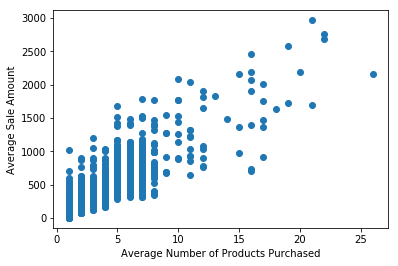

In [4]:
plt.scatter(df.Avg_Num_Products_Purchased,df.Avg_Sale_Amount)
plt.xlabel('Average Number of Products Purchased')
plt.ylabel('Average Sale Amount')
plt.show()

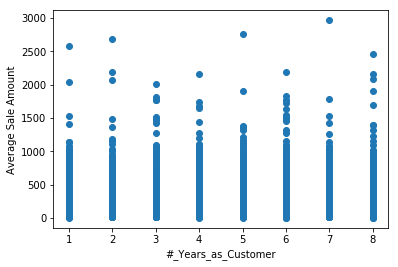

In [5]:
plt.scatter(df['#_Years_as_Customer'],df['Avg_Sale_Amount'])
plt.xlabel('#_Years_as_Customer')
plt.ylabel('Average Sale Amount')
plt.show()

<p>From the above plots, we can say that there is strong correlation between Avg_Num_Products_Purchased and Avg_Sale_Amount and there is no relation between no_of_Years_as_Customer and Avg_Sale_Amount.</p>
<p> Creating a model using Customer_Segment and Avg_Num_Products_Purchased as predictor variable where as Avg_Sale_Amount as target variable. 

In [6]:
cdf = df[['Customer_Segment','Avg_Num_Products_Purchased','Avg_Sale_Amount']]
cdf.head()

,Customer_Segment,Avg_Num_Products_Purchased,Avg_Sale_Amount
0,Store Mailing List,1,227.90
1,Store Mailing List,1,55.00
2,Store Mailing List,1,212.57
3,Store Mailing List,1,195.31
4,Store Mailing List,1,110.55


#### Train and test data

In [7]:
df1 = pd.get_dummies(cdf, columns=['Customer_Segment'])

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = df1[msk]
test = df1[~msk]

In [9]:
train.head()

,Avg_Num_Products_Purchased,Avg_Sale_Amount,Customer_Segment_Credit Card Only,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,1,227.90,0,0,0,1
1,1,55.00,0,0,0,1
2,1,212.57,0,0,0,1
3,1,195.31,0,0,0,1
4,1,110.55,0,0,0,1


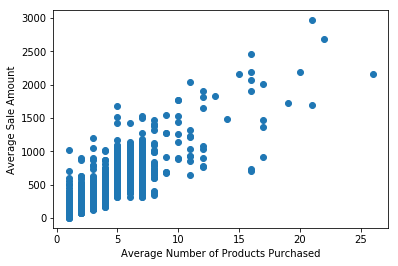

In [10]:
plt.scatter(train.Avg_Num_Products_Purchased,train.Avg_Sale_Amount)
plt.xlabel('Average Number of Products Purchased')
plt.ylabel('Average Sale Amount')
plt.show()

### Linear Regression Model

#### Modeling

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = np.asanyarray(train[['Avg_Num_Products_Purchased', 'Customer_Segment_Credit Card Only','Customer_Segment_Loyalty Club Only','Customer_Segment_Loyalty Club and Credit Card','Customer_Segment_Store Mailing List']])
y = np.asanyarray(train[['Avg_Sale_Amount']])
lm.fit(x, y)

print('Coefficients: ', lm.coef_)
print('Intercept: ', lm.intercept_)
print(lm.coef_[0][0])

('Coefficients: ', array([[  65.20189967,   30.94436641, -121.08156062,  311.59403615,
        -221.45684194]]))
('Intercept: ', array([281.4177214]))
65.20189966655914


#### Plot Outputs

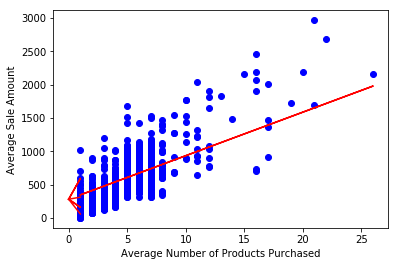

In [13]:
plt.scatter(train.Avg_Num_Products_Purchased, train.Avg_Sale_Amount, color='blue')
plt.plot(x, lm.coef_[0]*x + lm.intercept_[0], '-r')
plt.xlabel('Average Number of Products Purchased')
plt.ylabel('Average Sale Amount')
plt.show()

#### Evaluation

In [14]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Avg_Num_Products_Purchased', 'Customer_Segment_Credit Card Only','Customer_Segment_Loyalty Club Only','Customer_Segment_Loyalty Club and Credit Card','Customer_Segment_Store Mailing List']])
test_y = np.asanyarray(test[['Avg_Sale_Amount']])
test_yhat = lm.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_yhat-test_y)))
print("Residual sum of squares(RSME): %.2f" % np.mean(test_yhat-test_y)**2)
print("R2-score: %.2f" % r2_score(test_yhat, test_y))

Mean absolute error: 100.21
Residual sum of squares(RSME): 25.12
R2-score: 0.76


In [15]:
df_new = pd.read_excel('./Desktop/Udacity/LinearRegression/p1-mailinglist.xlsx')
df_new.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [17]:
Avg_Revenue = []
for i in range(0, len(df_new['Avg_Num_Products_Purchased'])):
    
    if df_new['Customer_Segment'][i] == 'Credit Card Only':
        
        Avg_Revenue.append(lm.intercept_[0] + (lm.coef_[0][0]*df_new['Avg_Num_Products_Purchased'][i]) + lm.coef_[0][1])
    
    elif df_new['Customer_Segment'][i] == 'Loyalty Club Only':
        
        Avg_Revenue.append(lm.intercept_[0] + (lm.coef_[0][0]*df_new['Avg_Num_Products_Purchased'][i]) + lm.coef_[0][2])
    
    elif df_new['Customer_Segment'][i] == 'Loyalty Club and Credit Card':
        
        Avg_Revenue.append(lm.intercept_[0] + (lm.coef_[0][0]*df_new['Avg_Num_Products_Purchased'][i]) + lm.coef_[0][3])
        
    else:
        
        Avg_Revenue.append(lm.intercept_[0] + (lm.coef_[0][0]*df_new['Avg_Num_Products_Purchased'][i]) + lm.coef_[0][4])
        
#print(Avg_Revenue)           

In [18]:
df_new['Avg_Revenue'] = Avg_Revenue
df_new['Avg_Revenue'] = (df_new['Avg_Revenue']) * (df_new['Score_Yes'])
df_new['Profit'] = (df_new['Avg_Revenue']*0.5) - 6.5
df_new.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes,Avg_Revenue,Profit
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036,108.575012,47.787506
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725,465.266436,226.133218
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882,357.025067,172.012534
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138,88.715755,37.857878
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706,163.279901,75.139951


In [1]:
df_new['Profit'].sum()

NameError: name 'df_new' is not defined


###### What is the expected profit from the new catalog (assuming the catalog is sent to these 250 customers)?

The expected profit the new 250 customers will be $21987.44
